# Laboratory 4

## Dmytro Romaniv
### Student ID: 151958

In [20]:
from numpy import pi

# importing Qiskit
from qiskit import QuantumCircuit, transpile
from qiskit_aer import Aer
from qiskit.visualization import plot_histogram, plot_bloch_multivector

In [21]:
bin(5)

'0b101'

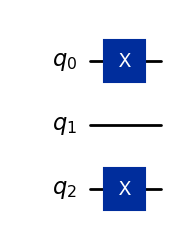

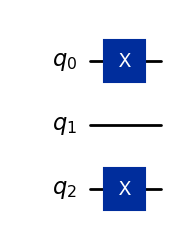

In [22]:
# Create the circuit
qc = QuantumCircuit(3)

# Encode the state 5
qc.x(0)
qc.x(2)
qc.draw('mpl')

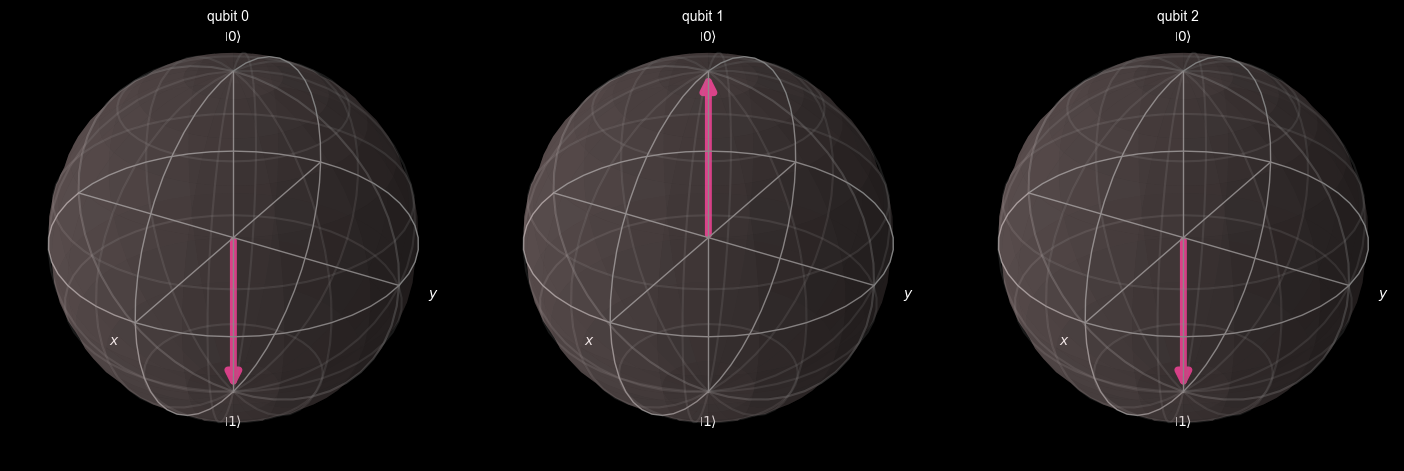

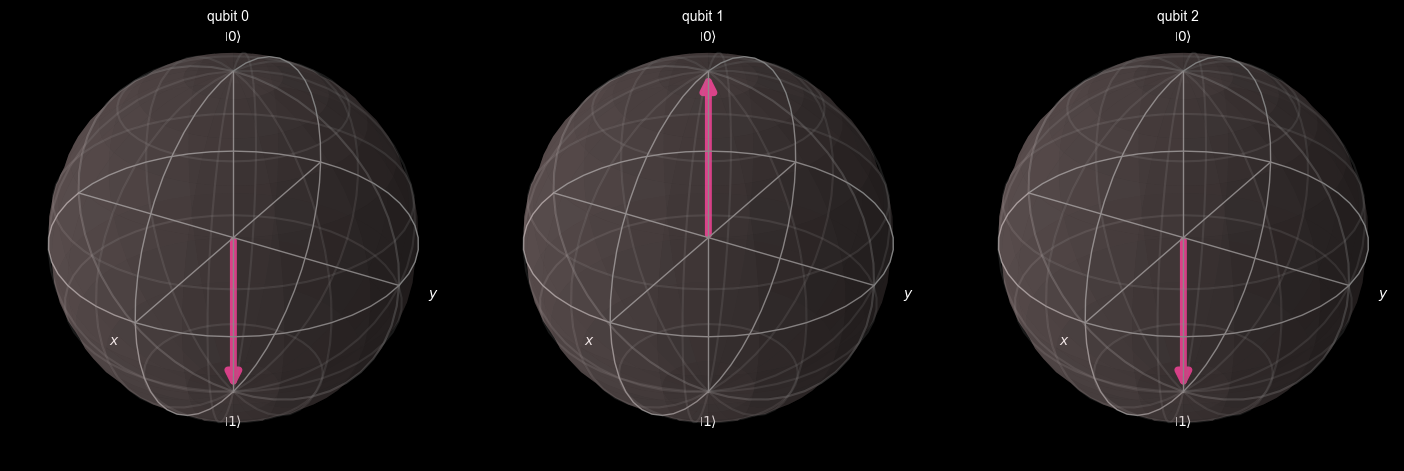

In [23]:
sim = Aer.get_backend("aer_simulator")
qc_init = qc.copy()
qc_init.save_statevector()
statevector = sim.run(qc_init).result().get_statevector()
plot_bloch_multivector(statevector)

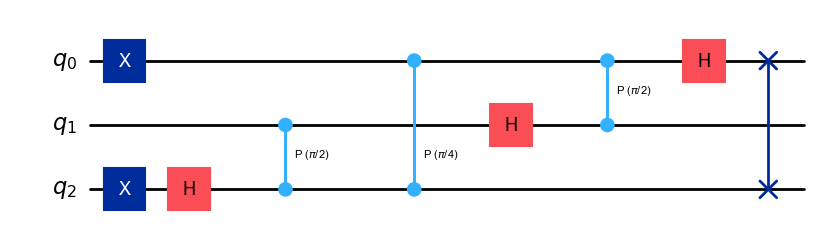

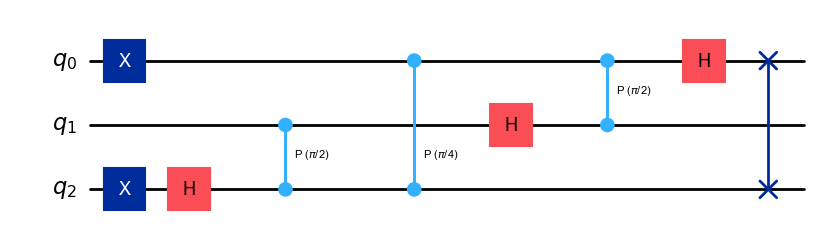

In [24]:
qc.h(2)
qc.cp(pi/2, 1, 2) # CROT from qubit 1 to qubit 2
qc.cp(pi/4, 0, 2) # CROT from qubit 2 to qubit 0
qc.h(1)
qc.cp(pi/2, 0, 1) # CROT from qubit 0 to qubit 1
qc.h(0)
qc.swap(0,2)
qc.draw('mpl')

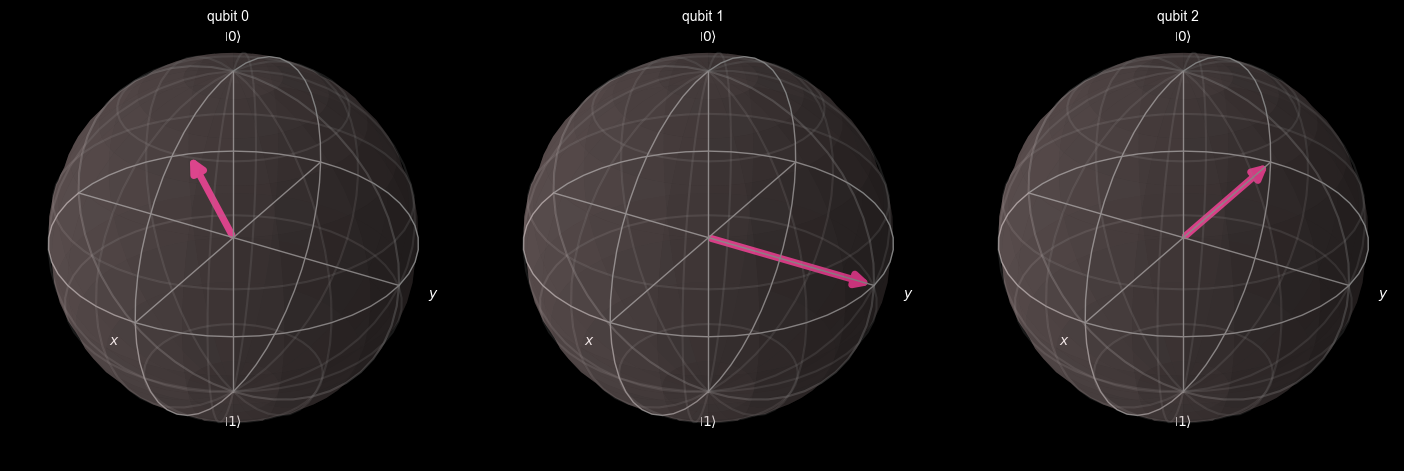

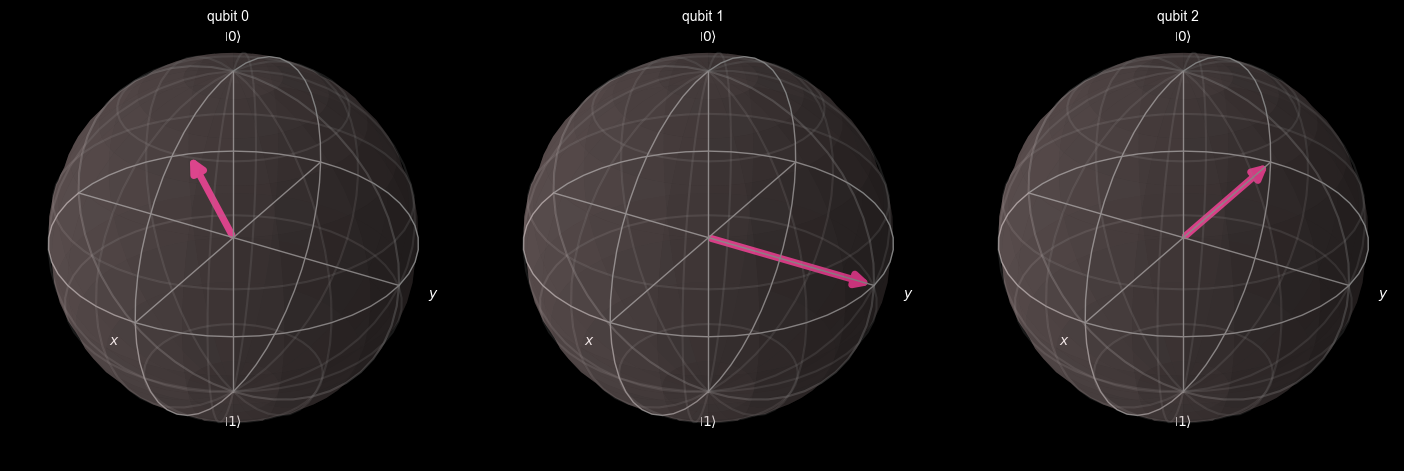

In [25]:
qc.save_statevector()
statevector = sim.run(qc).result().get_statevector()
plot_bloch_multivector(statevector)

In [26]:
# Comment to picture above
# We can see out QFT function has worked correctly. Compared the state {zero in QFT basis}|0^~)=|+++>, 
# Qubit 0 has been rotated by  5/8 of a full turn, and
# qubit 1 has been rotated by 10/8 full turns (equivalent to 1/4 of a full turn), 
# qubit 2 has been rotated by 20/8 full turns (equivalent to 1/2 of a full turn).

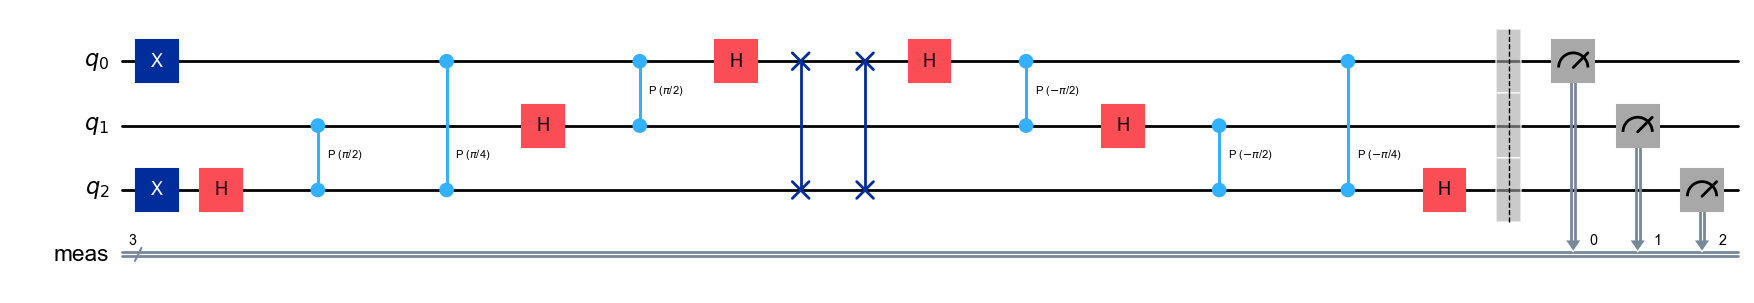

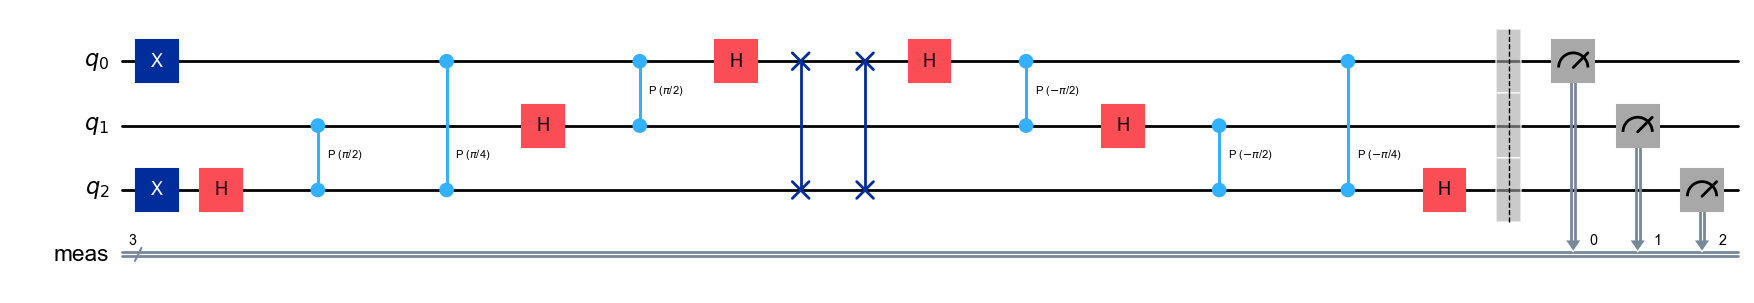

In [27]:
# normal QFT
qc=QuantumCircuit(3)
qc.x(0)
qc.x(2)
qc.h(2)
qc.cp(pi/2, 1, 2) # CROT from qubit 1 to qubit 2
qc.cp(pi/4, 0, 2) # CROT from qubit 2 to qubit 0
qc.h(1)
qc.cp(pi/2, 0, 1) # CROT from qubit 0 to qubit 1
qc.h(0)
qc.swap(0,2)
# inverse QFT
qc.swap(0,2)
qc.h(0)
qc.cp(-pi/2, 0, 1) # CROT from qubit 0 to qubit 1
qc.h(1)
qc.cp(-pi/2, 1, 2) # CROT from qubit 1 to qubit 2
qc.cp(-pi/4, 0, 2) # CROT from qubit 2 to qubit 0
qc.h(2)
qc.measure_all()
qc.draw('mpl')

In [28]:
backend = Aer.get_backend('qasm_simulator')
shots = 2048
transpiled_qc = transpile(qc, backend, optimization_level=3)
job = backend.run(transpiled_qc, shots=shots)

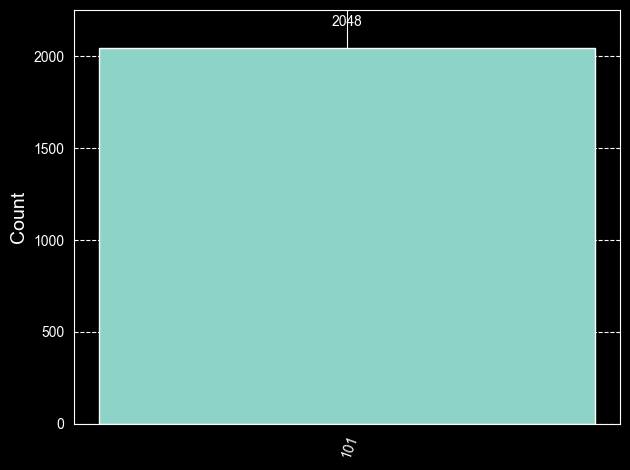

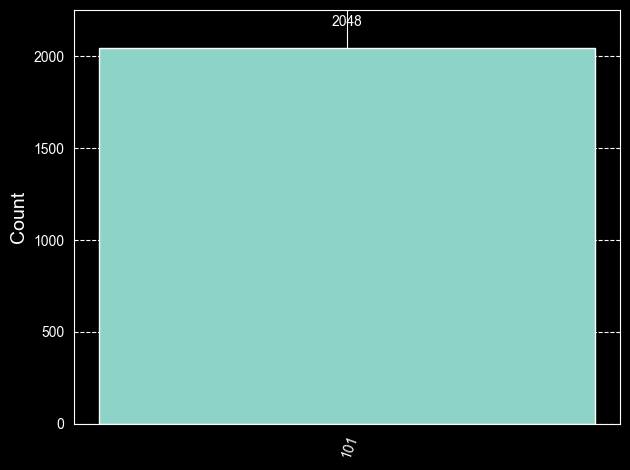

In [29]:
counts = job.result().get_counts()
plot_histogram(counts)

In [30]:
# create the bin 3 - make a QFT 
# first encode a number in the computational basis

In [31]:
bin(3)

'0b11'

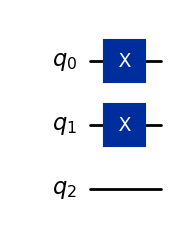

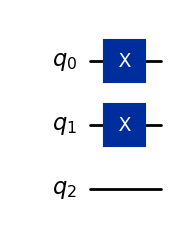

In [32]:
# The number 3 in binary is 110. Let's encode this into our qubits:
# Create the circuit
qc = QuantumCircuit(3)

# Encode the state 5
qc.x(0)
qc.x(1)
qc.draw('mpl')

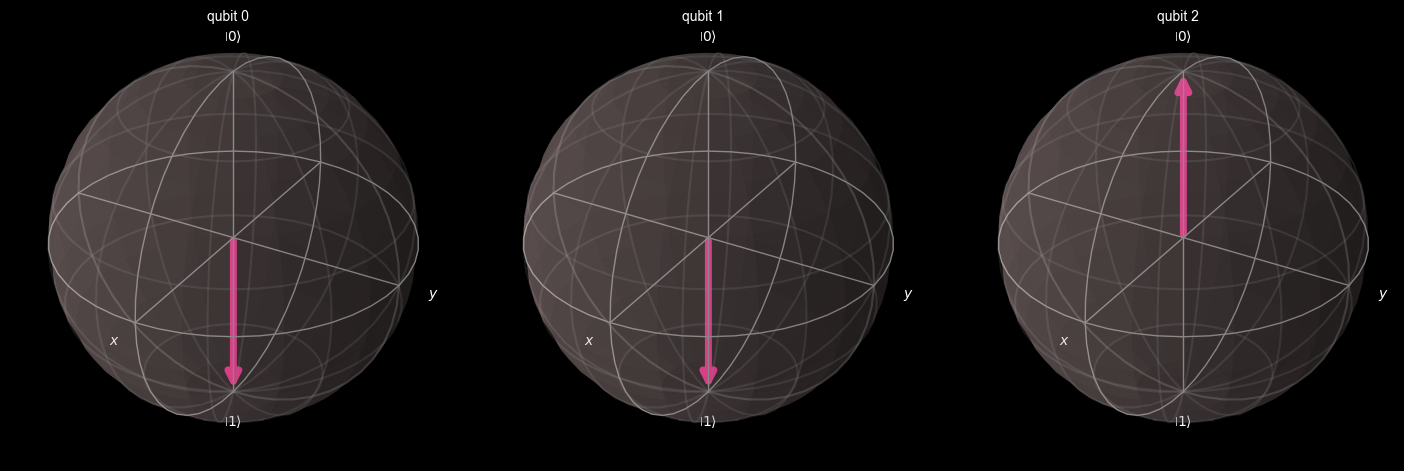

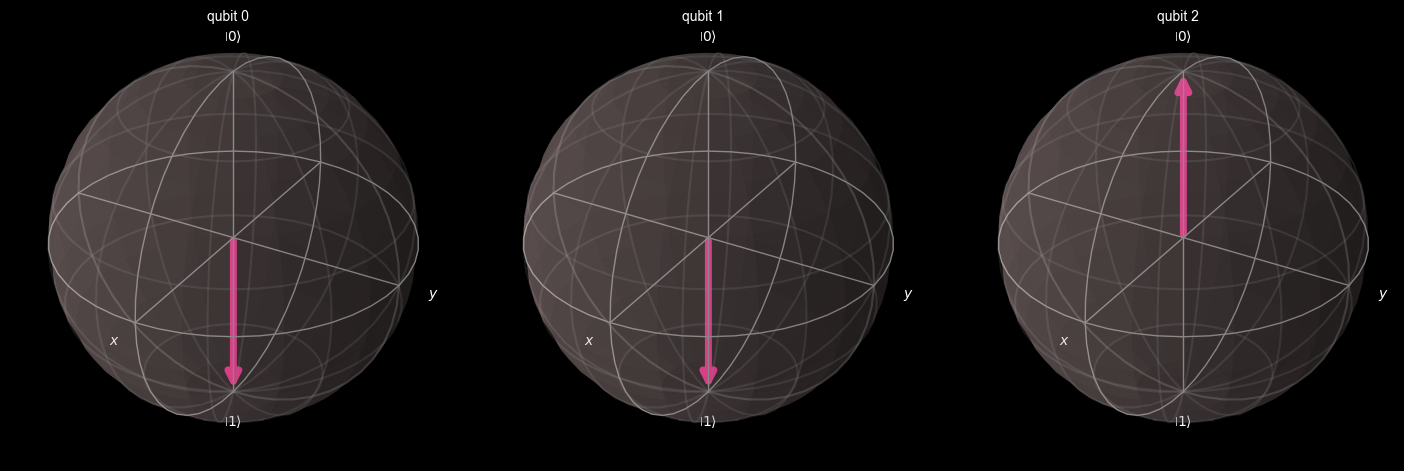

In [33]:
sim = Aer.get_backend("aer_simulator")
qc_init = qc.copy()
qc_init.save_statevector()
statevector = sim.run(qc_init).result().get_statevector()
plot_bloch_multivector(statevector)

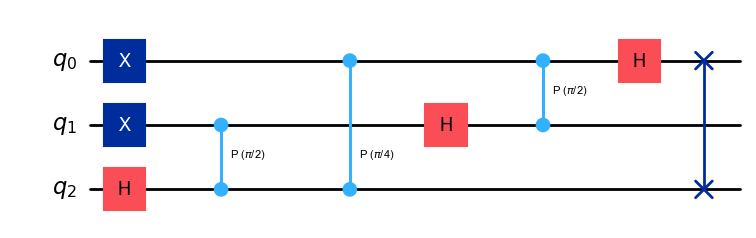

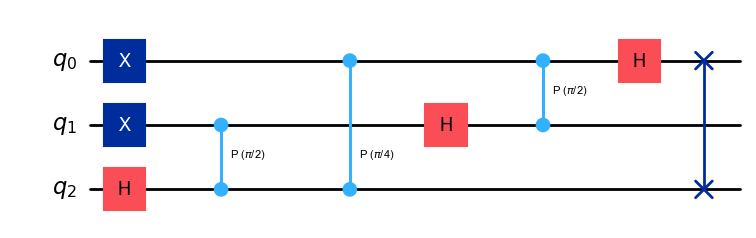

In [34]:
# create QFT circuit 
qc=QuantumCircuit(3)
qc.x(0)
qc.x(1)
qc.h(2)
qc.cp(pi/2, 1, 2) # CROT from qubit 1 to qubit 2
qc.cp(pi/4, 0, 2) # CROT from qubit 2 to qubit 0
qc.h(1)
qc.cp(pi/2, 0, 1) # CROT from qubit 0 to qubit 1
qc.h(0)
qc.swap(0,2)
qc.draw('mpl')

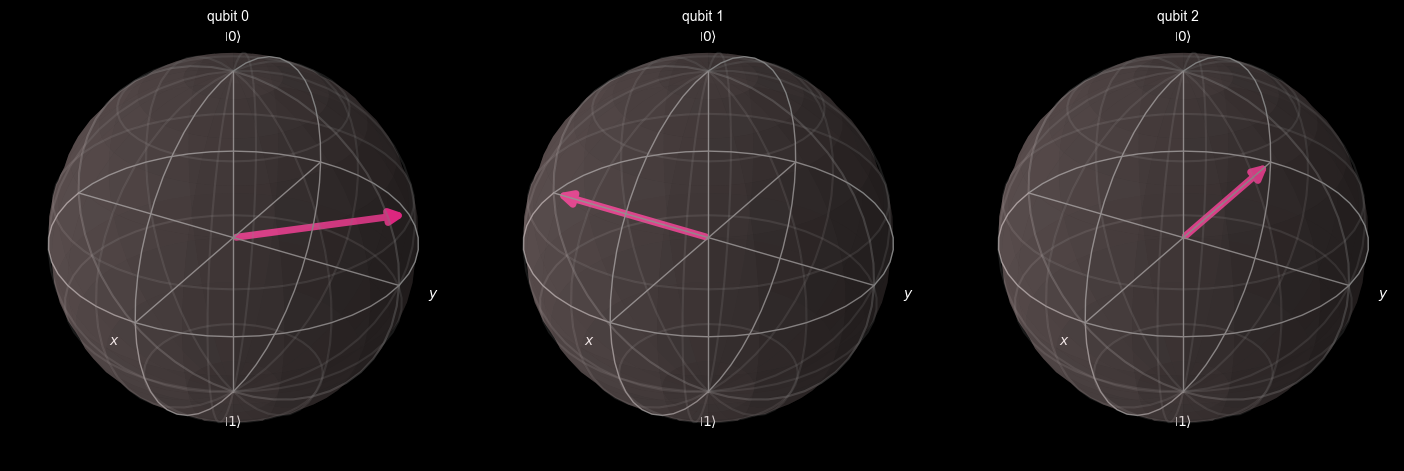

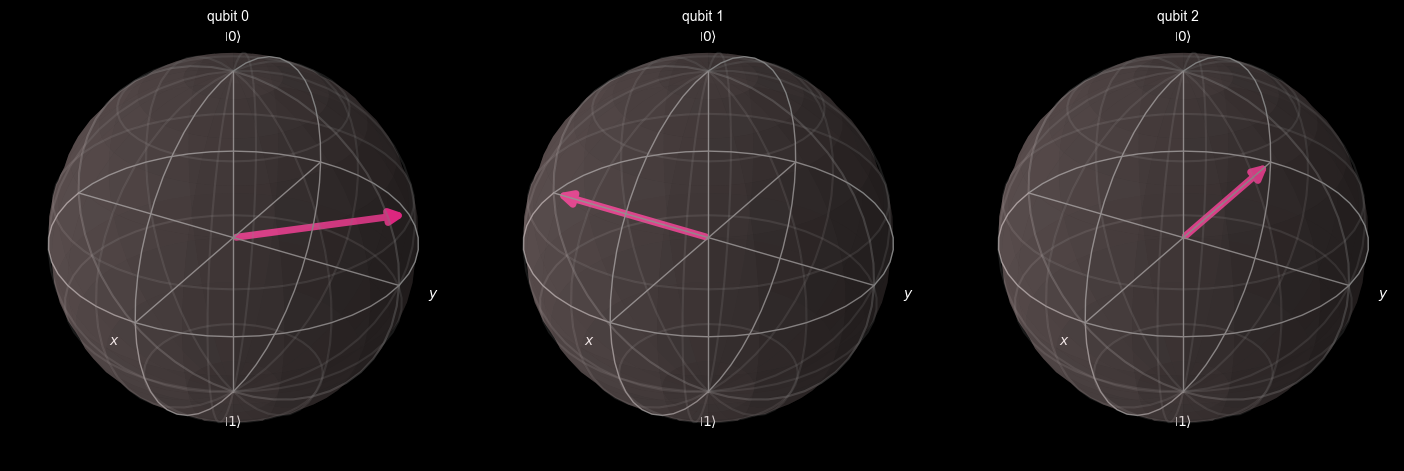

In [35]:
qc.save_statevector()
statevector = sim.run(qc).result().get_statevector()
plot_bloch_multivector(statevector)

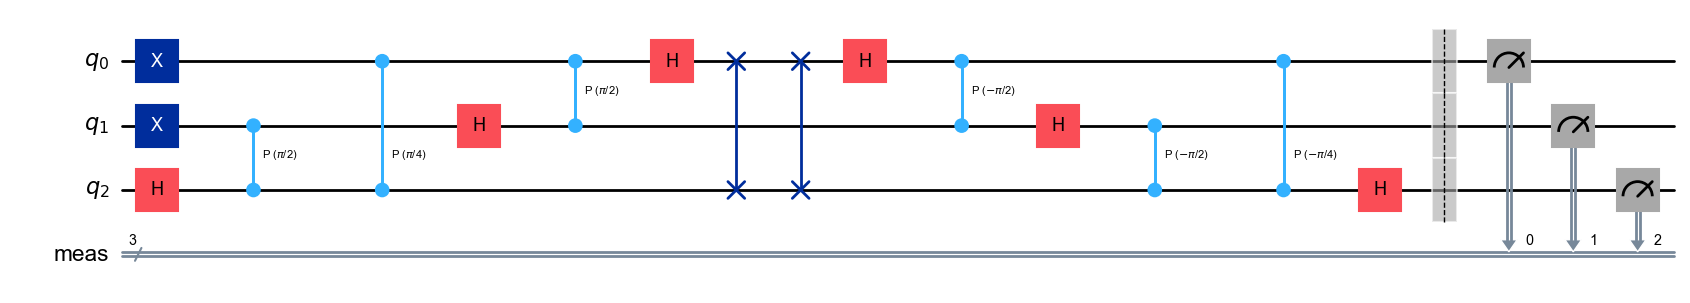

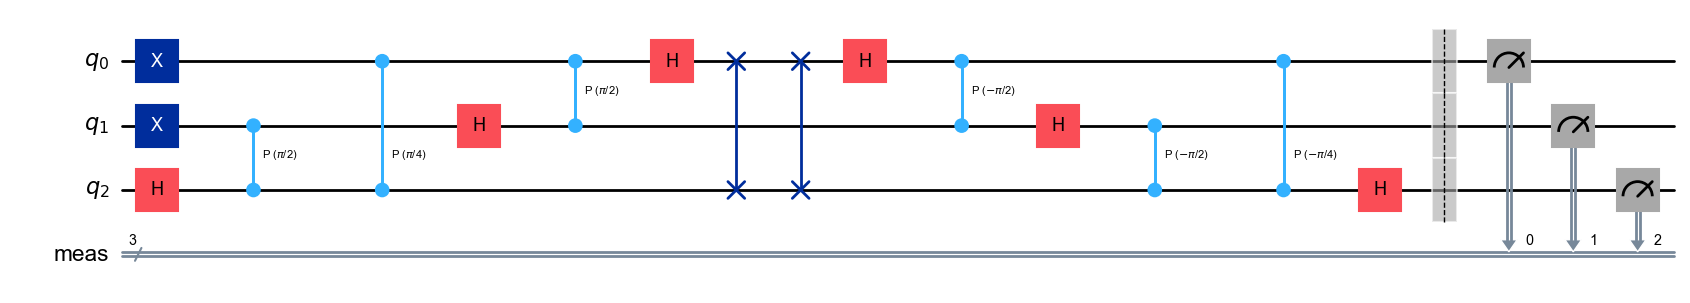

In [36]:
# create QFT circuit 
qc=QuantumCircuit(3)
qc.x(0)
qc.x(1)
qc.h(2)
qc.cp(pi/2, 1, 2) # CROT from qubit 1 to qubit 2
qc.cp(pi/4, 0, 2) # CROT from qubit 2 to qubit 0
qc.h(1)
qc.cp(pi/2, 0, 1) # CROT from qubit 0 to qubit 1
qc.h(0)
qc.swap(0,2)
# inverse QFT
qc.swap(0,2)
qc.h(0)
qc.cp(-pi/2, 0, 1) # CROT from qubit 0 to qubit 1
qc.h(1)
qc.cp(-pi/2, 1, 2) # CROT from qubit 1 to qubit 2
qc.cp(-pi/4, 0, 2) # CROT from qubit 2 to qubit 0
qc.h(2)
qc.measure_all()
qc.draw('mpl')

In [37]:
backend = Aer.get_backend('qasm_simulator')
shots = 2048
transpiled_qc = transpile(qc, backend, optimization_level=3)
job = backend.run(transpiled_qc, shots=shots)
#job_monitor(job)

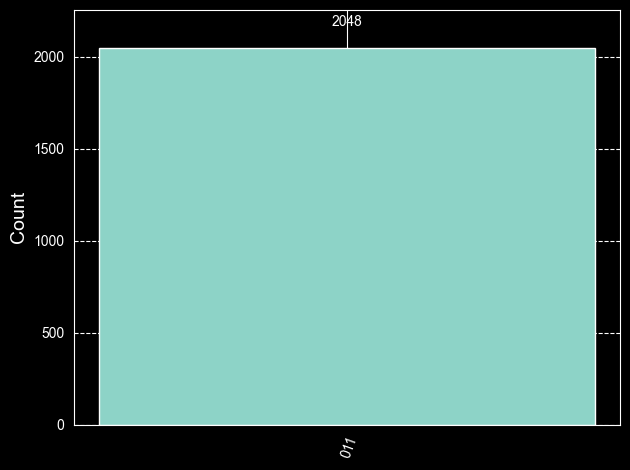

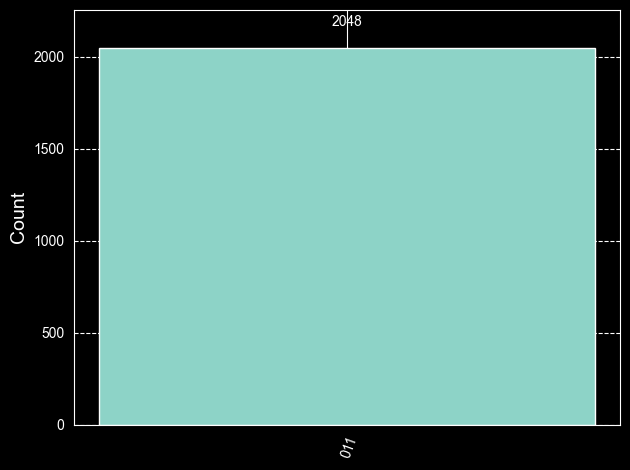

In [38]:
counts = job.result().get_counts()
plot_histogram(counts)

## Task 1: Find state |a\~> such that InverseQFT |a\~> = |100>

Task 1: Bloch Sphere for state |a~> = QFT|100>


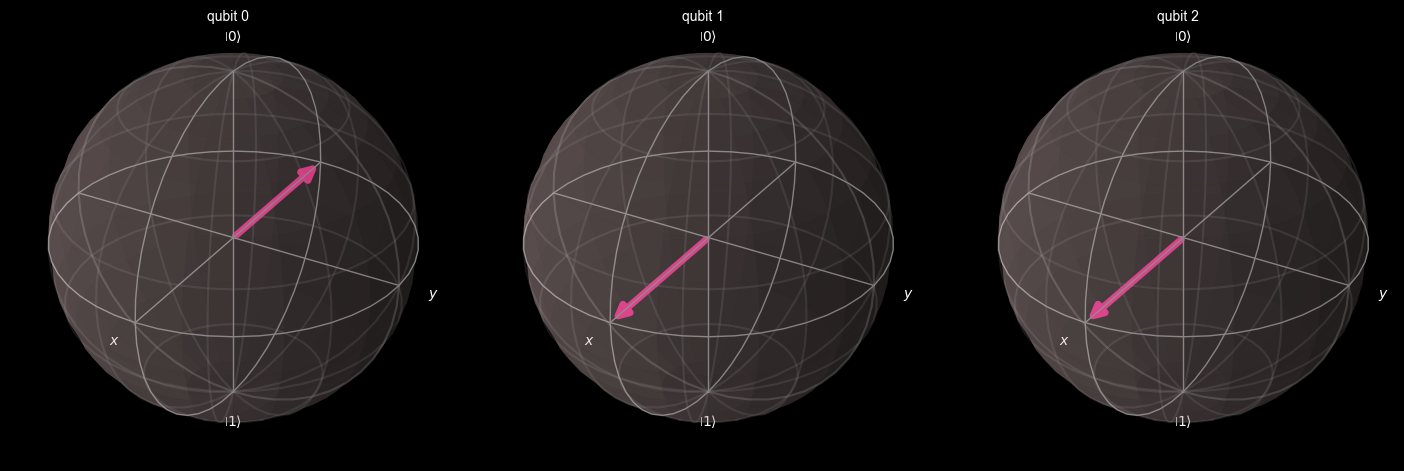

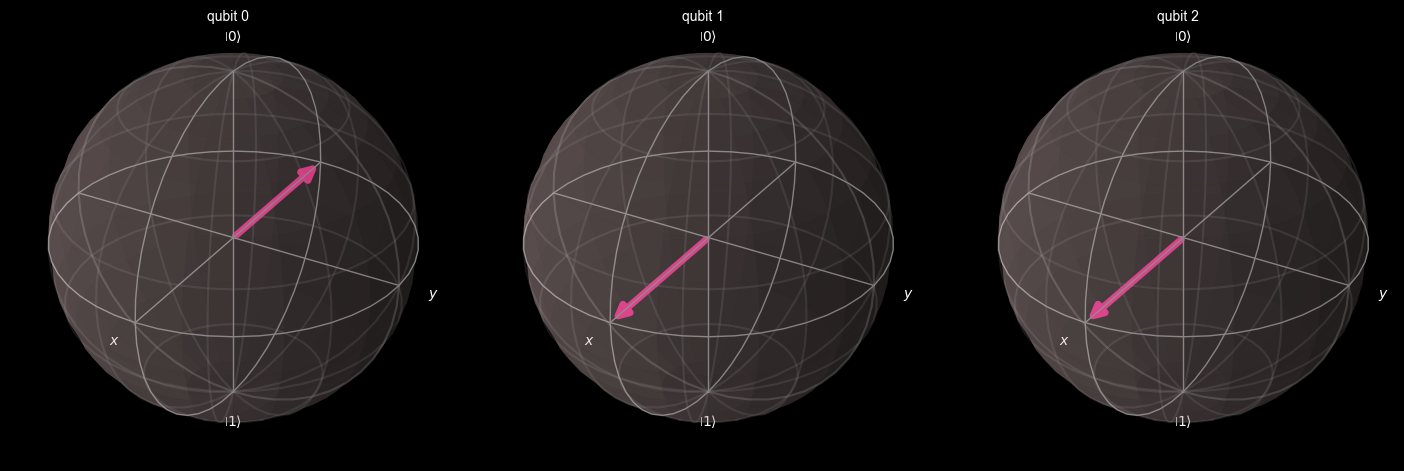

In [39]:
# Create circuit
qc_task1 = QuantumCircuit(3)

# 1. Encode the state |100> (Decimal 4)
qc_task1.x(2)

# 2. Apply QFT
qc_task1.h(2)
qc_task1.cp(pi/2, 1, 2)
qc_task1.cp(pi/4, 0, 2)
qc_task1.h(1)
qc_task1.cp(pi/2, 0, 1)
qc_task1.h(0)
qc_task1.swap(0, 2)

# 3. Simulate and visualize on Bloch spheres
sim = Aer.get_backend("aer_simulator")
qc_task1.save_statevector()
statevector_a = sim.run(qc_task1).result().get_statevector()

print("Task 1: Bloch Sphere for state |a~> = QFT|100>")
plot_bloch_multivector(statevector_a)

## Task 2: Find state |b\~> such that InverseQFT |b\~> = |011>

Task 2: Bloch Sphere for state |b~> = QFT|011>


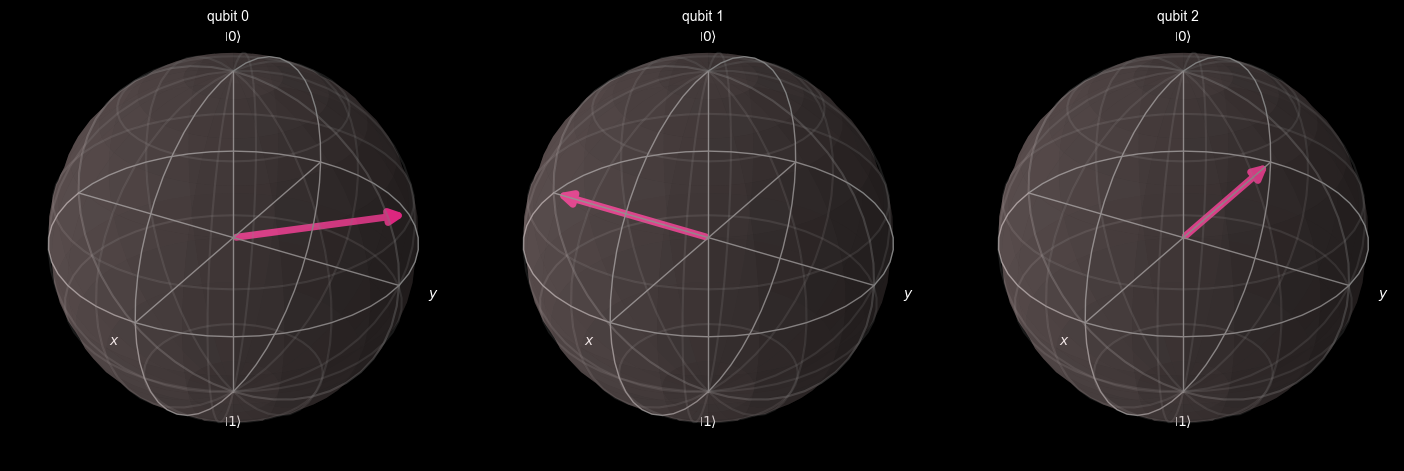

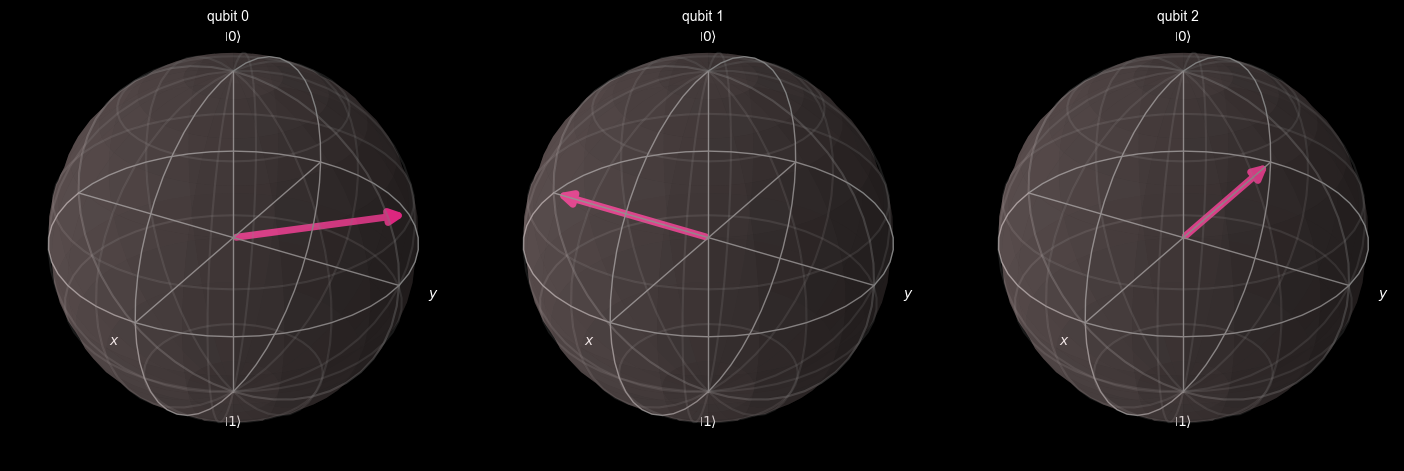

In [40]:
# Create circuit
qc_task2 = QuantumCircuit(3)

# 1. Encode the state |011> (Decimal 3)
qc_task2.x(0)
qc_task2.x(1)

# 2. Apply QFT
qc_task2.h(2)
qc_task2.cp(pi/2, 1, 2)
qc_task2.cp(pi/4, 0, 2)
qc_task2.h(1)
qc_task2.cp(pi/2, 0, 1)
qc_task2.h(0)
qc_task2.swap(0, 2)

# 3. Simulate and visualize
qc_task2.save_statevector()
statevector_b = sim.run(qc_task2).result().get_statevector()

print("Task 2: Bloch Sphere for state |b~> = QFT|011>")
plot_bloch_multivector(statevector_b)

## Task 3: Present QFT of states from |000> to |111>

Task 3: Visualizing QFT for all 3-qubit basis states

State |000> (Decimal 0) -> QFT Transformed:


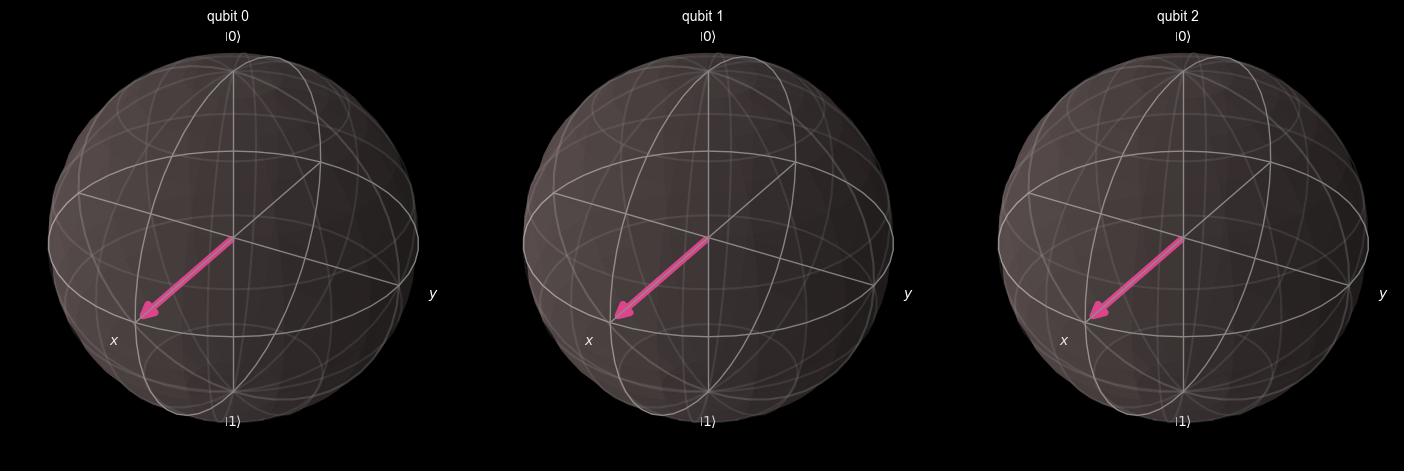


State |001> (Decimal 1) -> QFT Transformed:


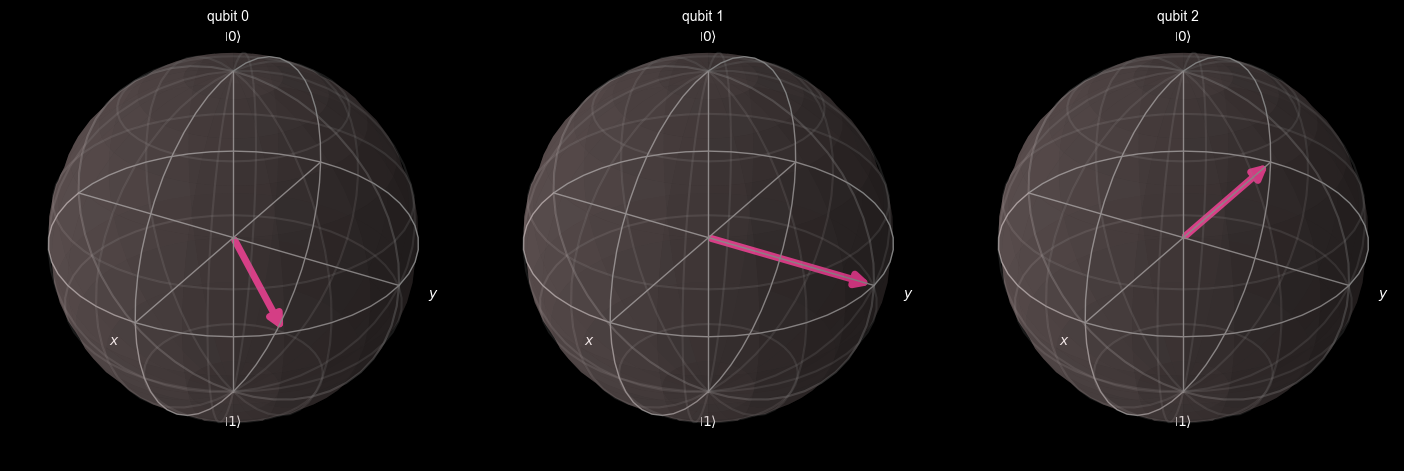


State |010> (Decimal 2) -> QFT Transformed:


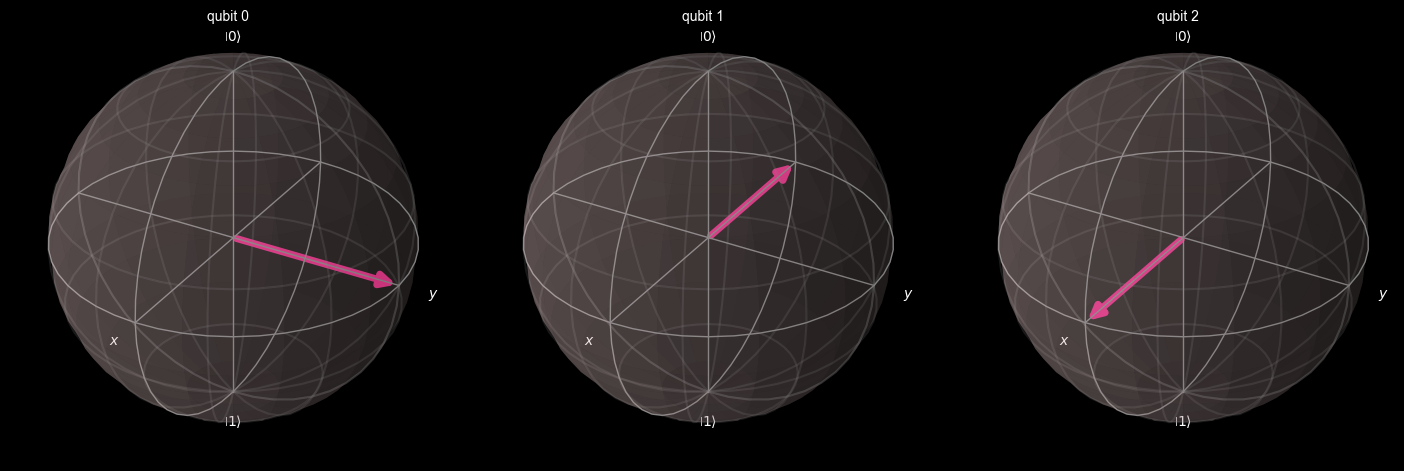


State |011> (Decimal 3) -> QFT Transformed:


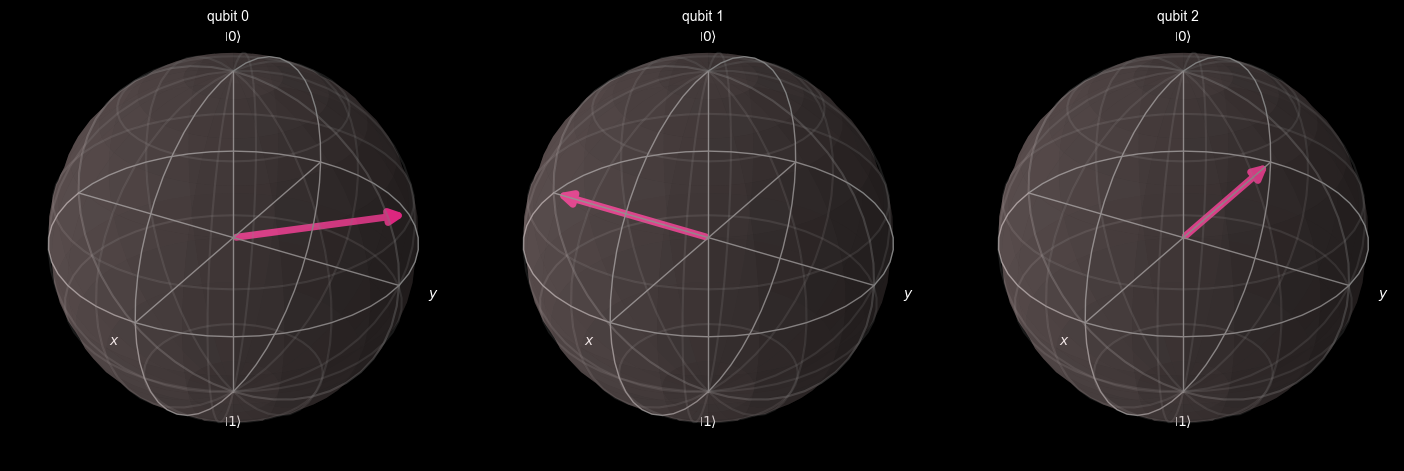


State |100> (Decimal 4) -> QFT Transformed:


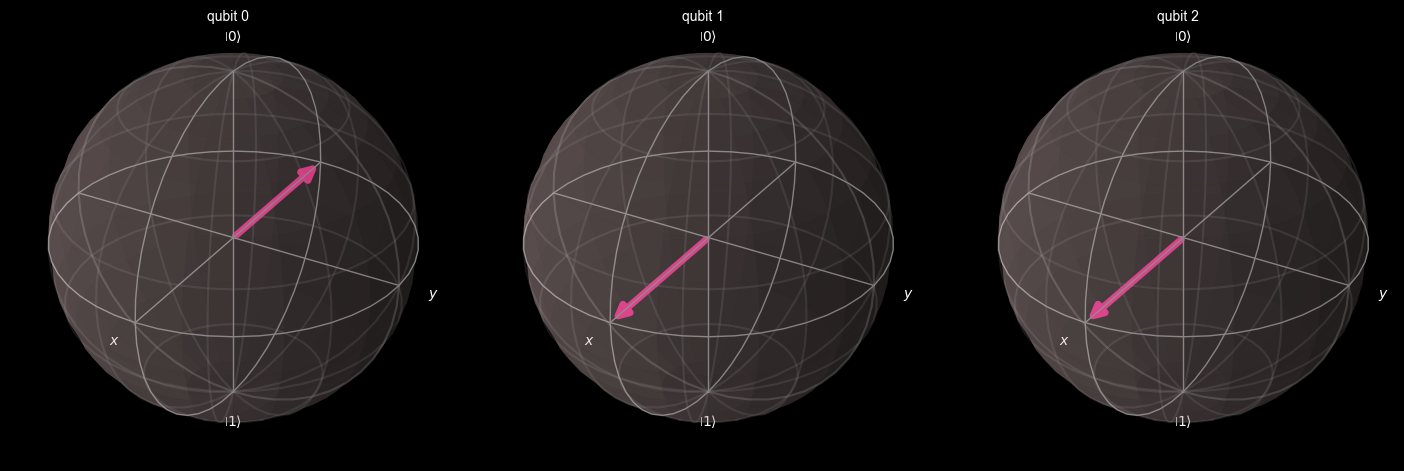


State |101> (Decimal 5) -> QFT Transformed:


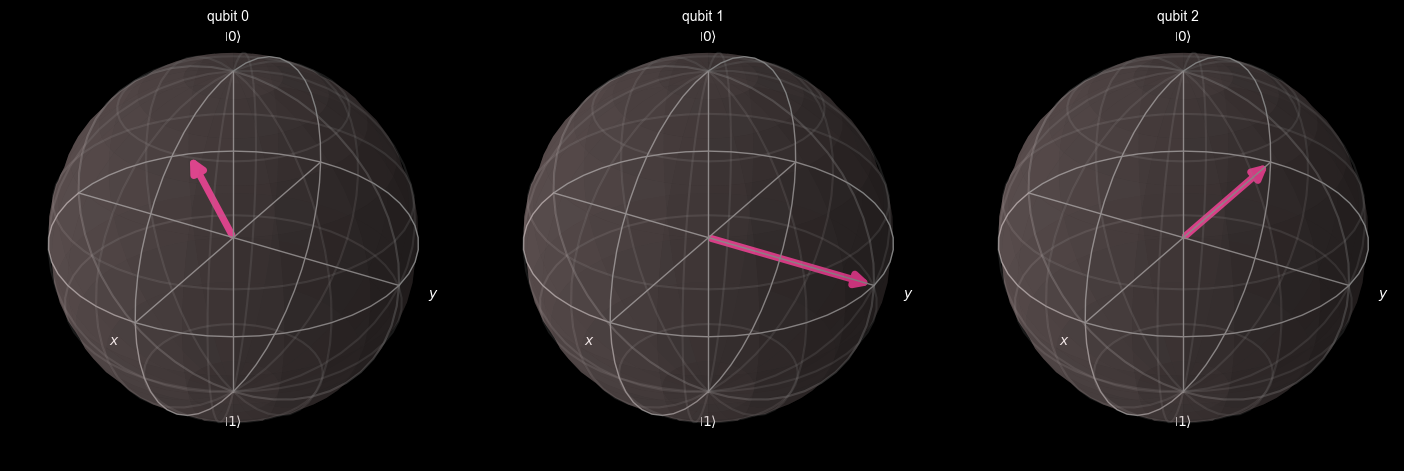


State |110> (Decimal 6) -> QFT Transformed:


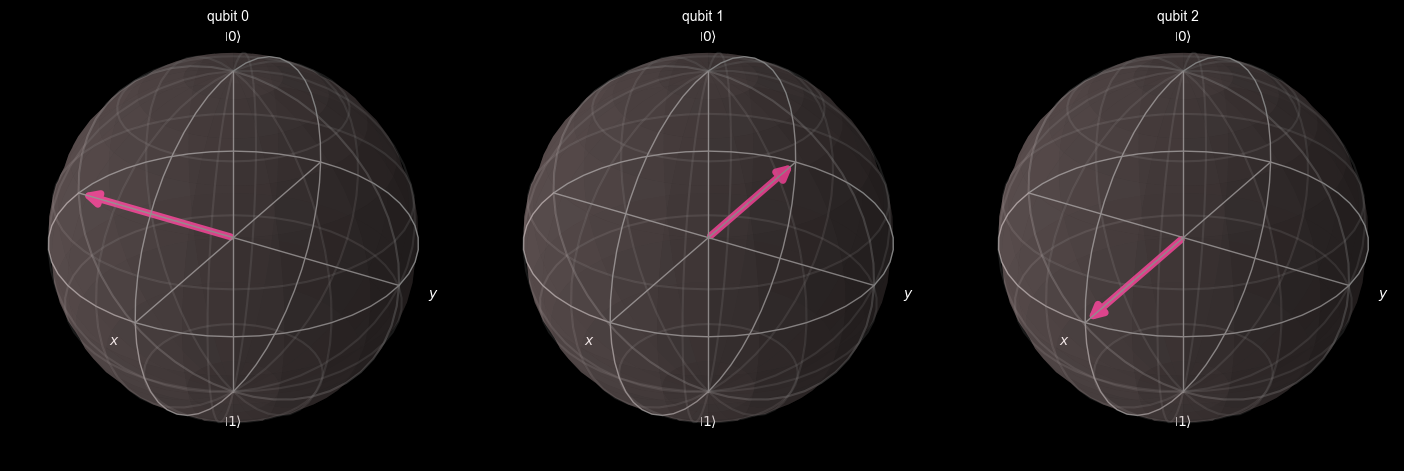


State |111> (Decimal 7) -> QFT Transformed:


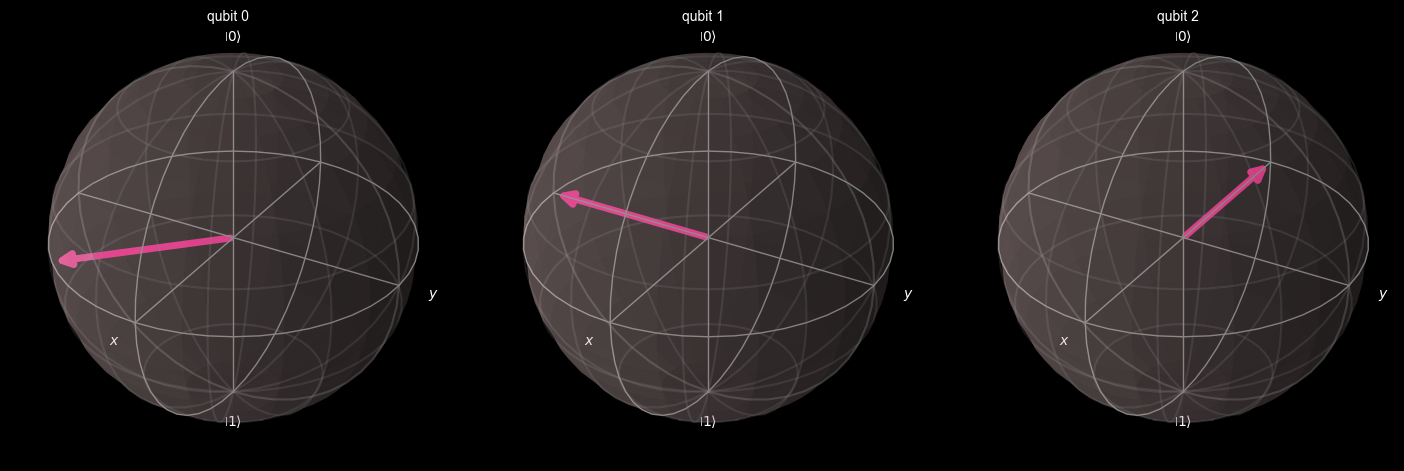

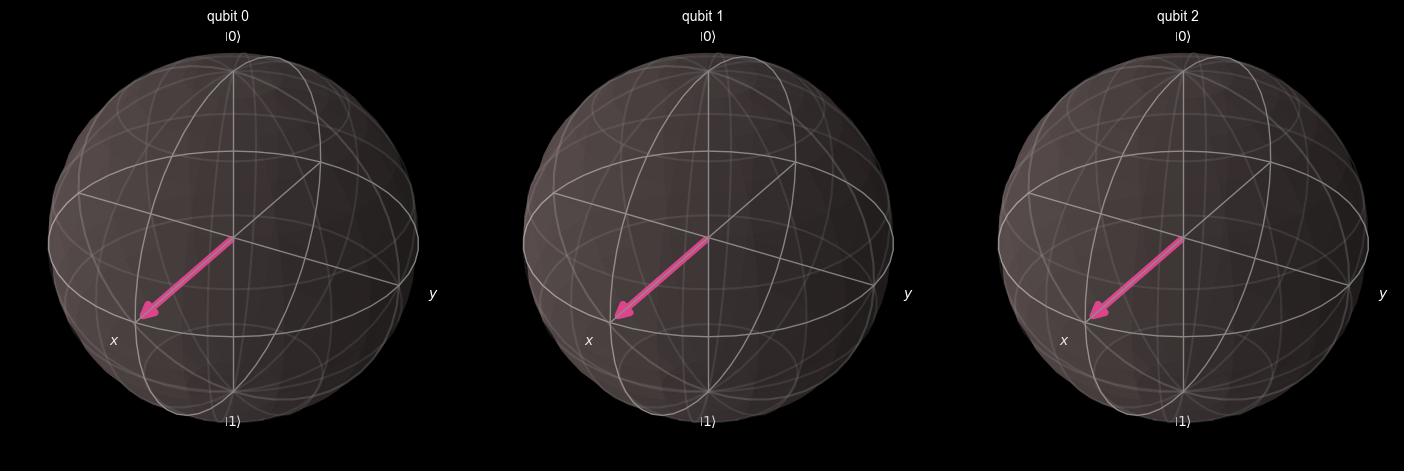

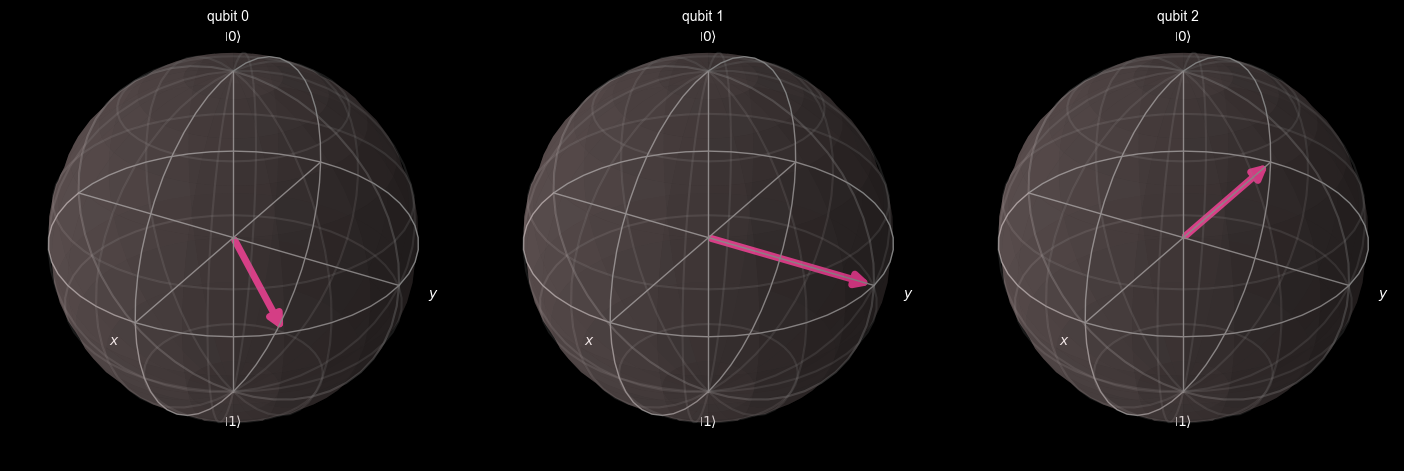

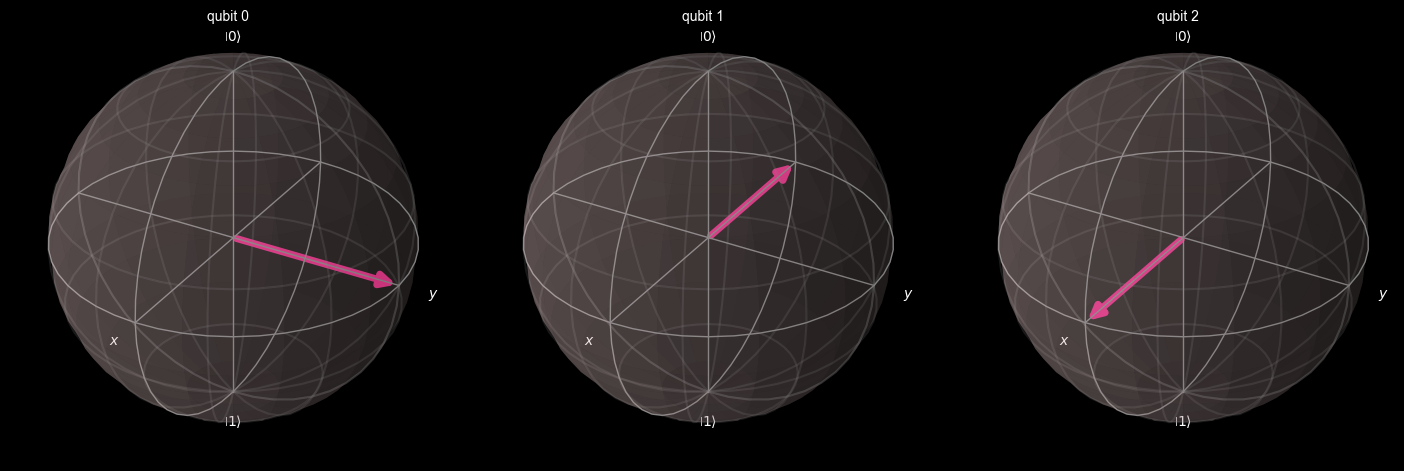

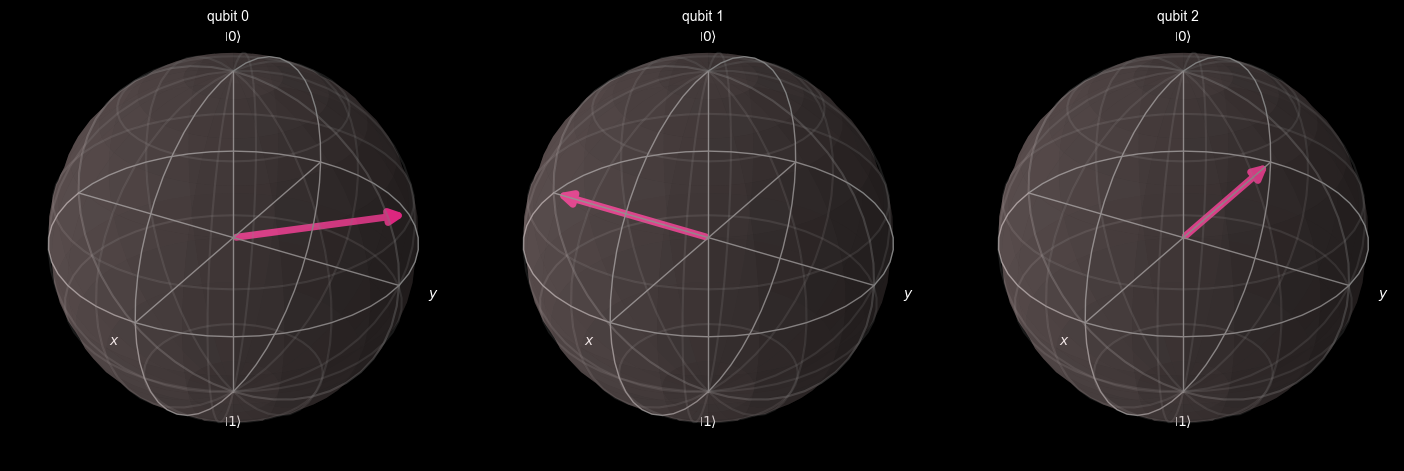

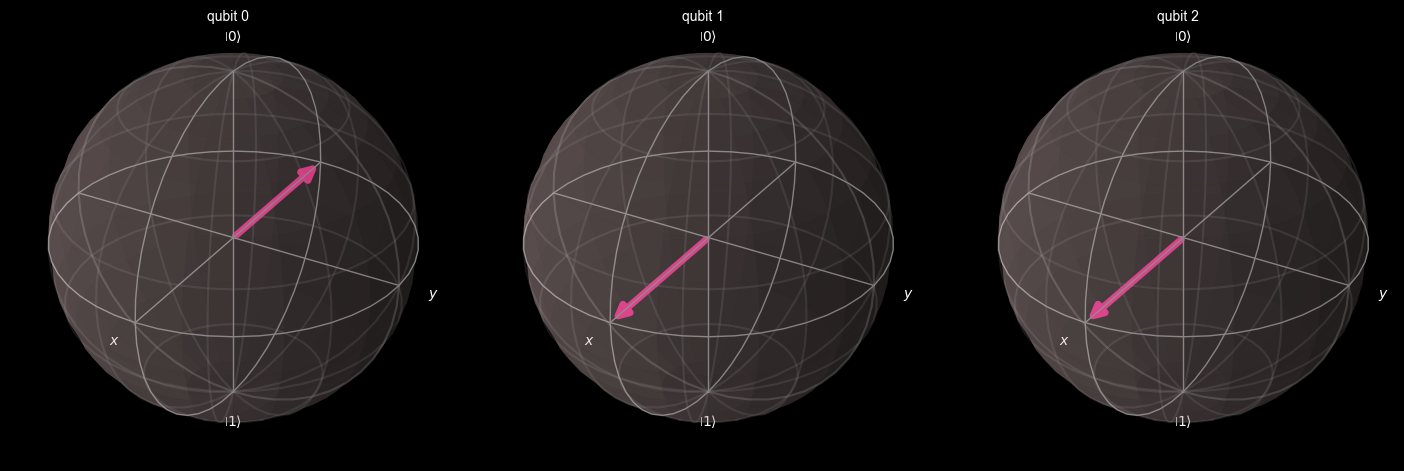

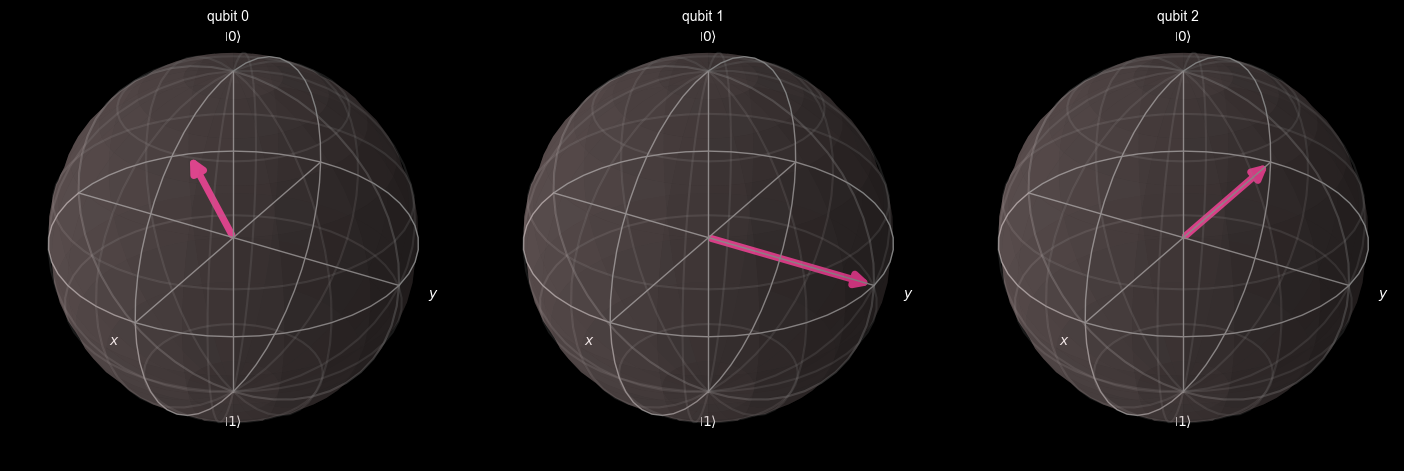

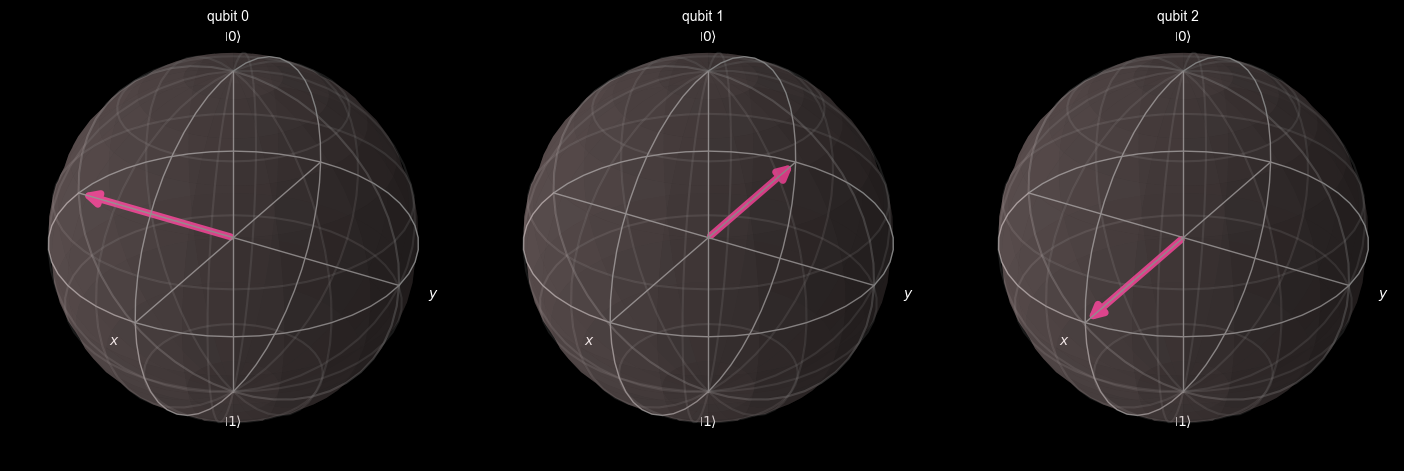

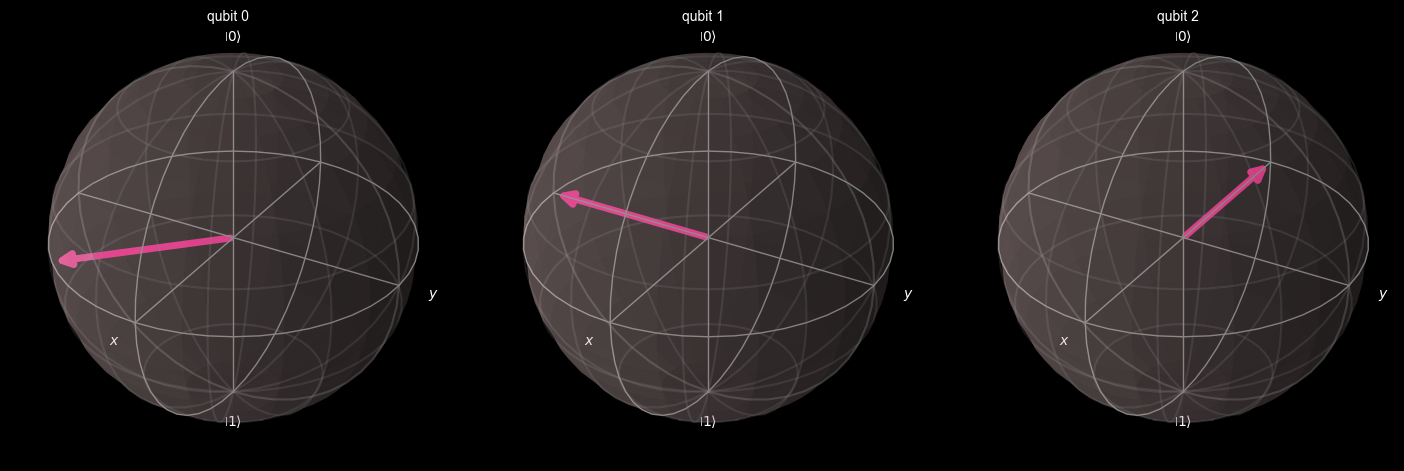

In [41]:
print("Task 3: Visualizing QFT for all 3-qubit basis states")

# Loop through numbers 0 to 7
for i in range(8):
    qc_temp = QuantumCircuit(3)

    # 1. Get binary representation (e.g., 5 -> '101')
    binary_str = format(i, '03b')

    # Apply X gates according to binary string
    for qubit_idx, bit in enumerate(reversed(binary_str)):
        if bit == '1':
            qc_temp.x(qubit_idx)

    # 2. Apply QFT
    qc_temp.h(2)
    qc_temp.cp(pi/2, 1, 2)
    qc_temp.cp(pi/4, 0, 2)
    qc_temp.h(1)
    qc_temp.cp(pi/2, 0, 1)
    qc_temp.h(0)
    qc_temp.swap(0, 2)

    # 3. Simulate and plot
    qc_temp.save_statevector()
    sv = sim.run(qc_temp).result().get_statevector()

    print(f"\nState |{binary_str}> (Decimal {i}) -> QFT Transformed:")
    display(plot_bloch_multivector(sv))

## Task 4: Recursive QFT function for n qubits

Task 4: Verifying Recursive QFT for n=3 using Unitary Simulator
Circuit Diagram:


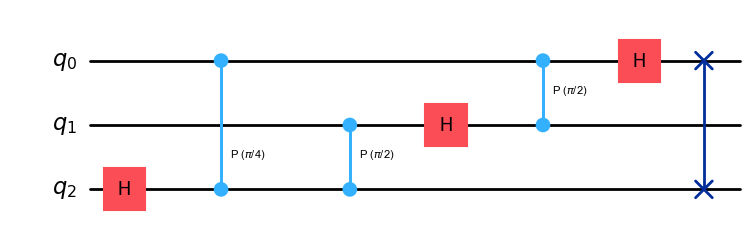


Unitary Matrix (Top-Left 4x4 block):
[[ 0.354+0.j     0.354-0.j     0.354-0.j     0.354-0.j   ]
 [ 0.354+0.j    -0.354+0.j     0.354-0.j    -0.354+0.j   ]
 [ 0.354+0.j     0.   +0.354j -0.354+0.j    -0.   -0.354j]
 [ 0.354+0.j    -0.   -0.354j -0.354+0.j     0.   +0.354j]]

Recursive QFT successfully generated!


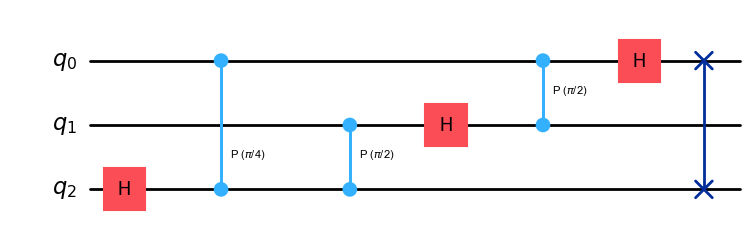

In [42]:
def qft_rotations(circuit, n):
    """Performs qft rotations on the first n qubits in circuit (without swaps)"""
    if n == 0:
        return circuit
    n -= 1
    circuit.h(n)
    for qubit in range(n):
        # Controlled phase rotation: angle = pi / 2^(k) where k is distance
        circuit.cp(pi/2**(n-qubit), qubit, n)
    # Recursively call for the next qubit down
    qft_rotations(circuit, n)

def swap_registers(circuit, n):
    """Swaps qubits to match QFT output order"""
    for qubit in range(n//2):
        circuit.swap(qubit, n-qubit-1)
    return circuit

def qft_recursive(circuit, n):
    """General QFT function using recursion"""
    qft_rotations(circuit, n)
    swap_registers(circuit, n)
    return circuit

print("Task 4: Verifying Recursive QFT for n=3 using Unitary Simulator")

# Build circuit with recursive function
qc_rec = QuantumCircuit(3)
qft_recursive(qc_rec, 3)

# Use Unitary Simulator to get the matrix
backend_unitary = Aer.get_backend('unitary_simulator')
# Need to transpile specifically for the unitary simulator
qc_rec_trans = transpile(qc_rec, backend_unitary)
result = backend_unitary.run(qc_rec_trans).result()
unitary = result.get_unitary(qc_rec_trans, decimals=3)

print("Circuit Diagram:")
display(qc_rec.draw('mpl'))

print("\nUnitary Matrix (Top-Left 4x4 block):")
# Printing just a part to verify it's generating a matrix
print(unitary.data[:4,:4])